### Machine Learning Tutorial - Naive Bayes: Exercise

Use wine dataset from sklearn.datasets to classify wines into 3 categories. Load the dataset and split it into test and train. After that train the model using Gaussian,Multinominal and Bernoulli classifier and post which model performs better. Use the trained model to perform some predictions on test data.


In [14]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
wine=load_wine()
df_wine=pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= wine['feature_names'] + ['Class'])
df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


In [18]:
#Look if there is any null values in the dataset
df_wine.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
Class                           0
dtype: int64

In [16]:
#Create feature dataframe
X=df_wine.drop(['Class'],axis=1)
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [17]:
#Create numpy target vector
y=df_wine['Class']
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
173    2.0
174    2.0
175    2.0
176    2.0
177    2.0
Name: Class, Length: 178, dtype: float64

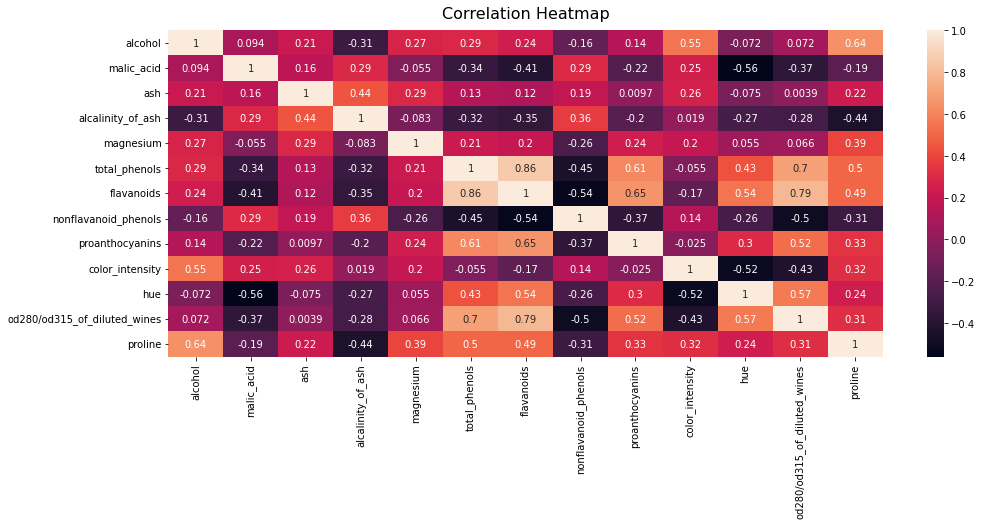

In [26]:
#Naive bayes considers features pairs with correlation near zero 
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
heatmap=sns.heatmap(X.corr(),annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':16}, pad=12);

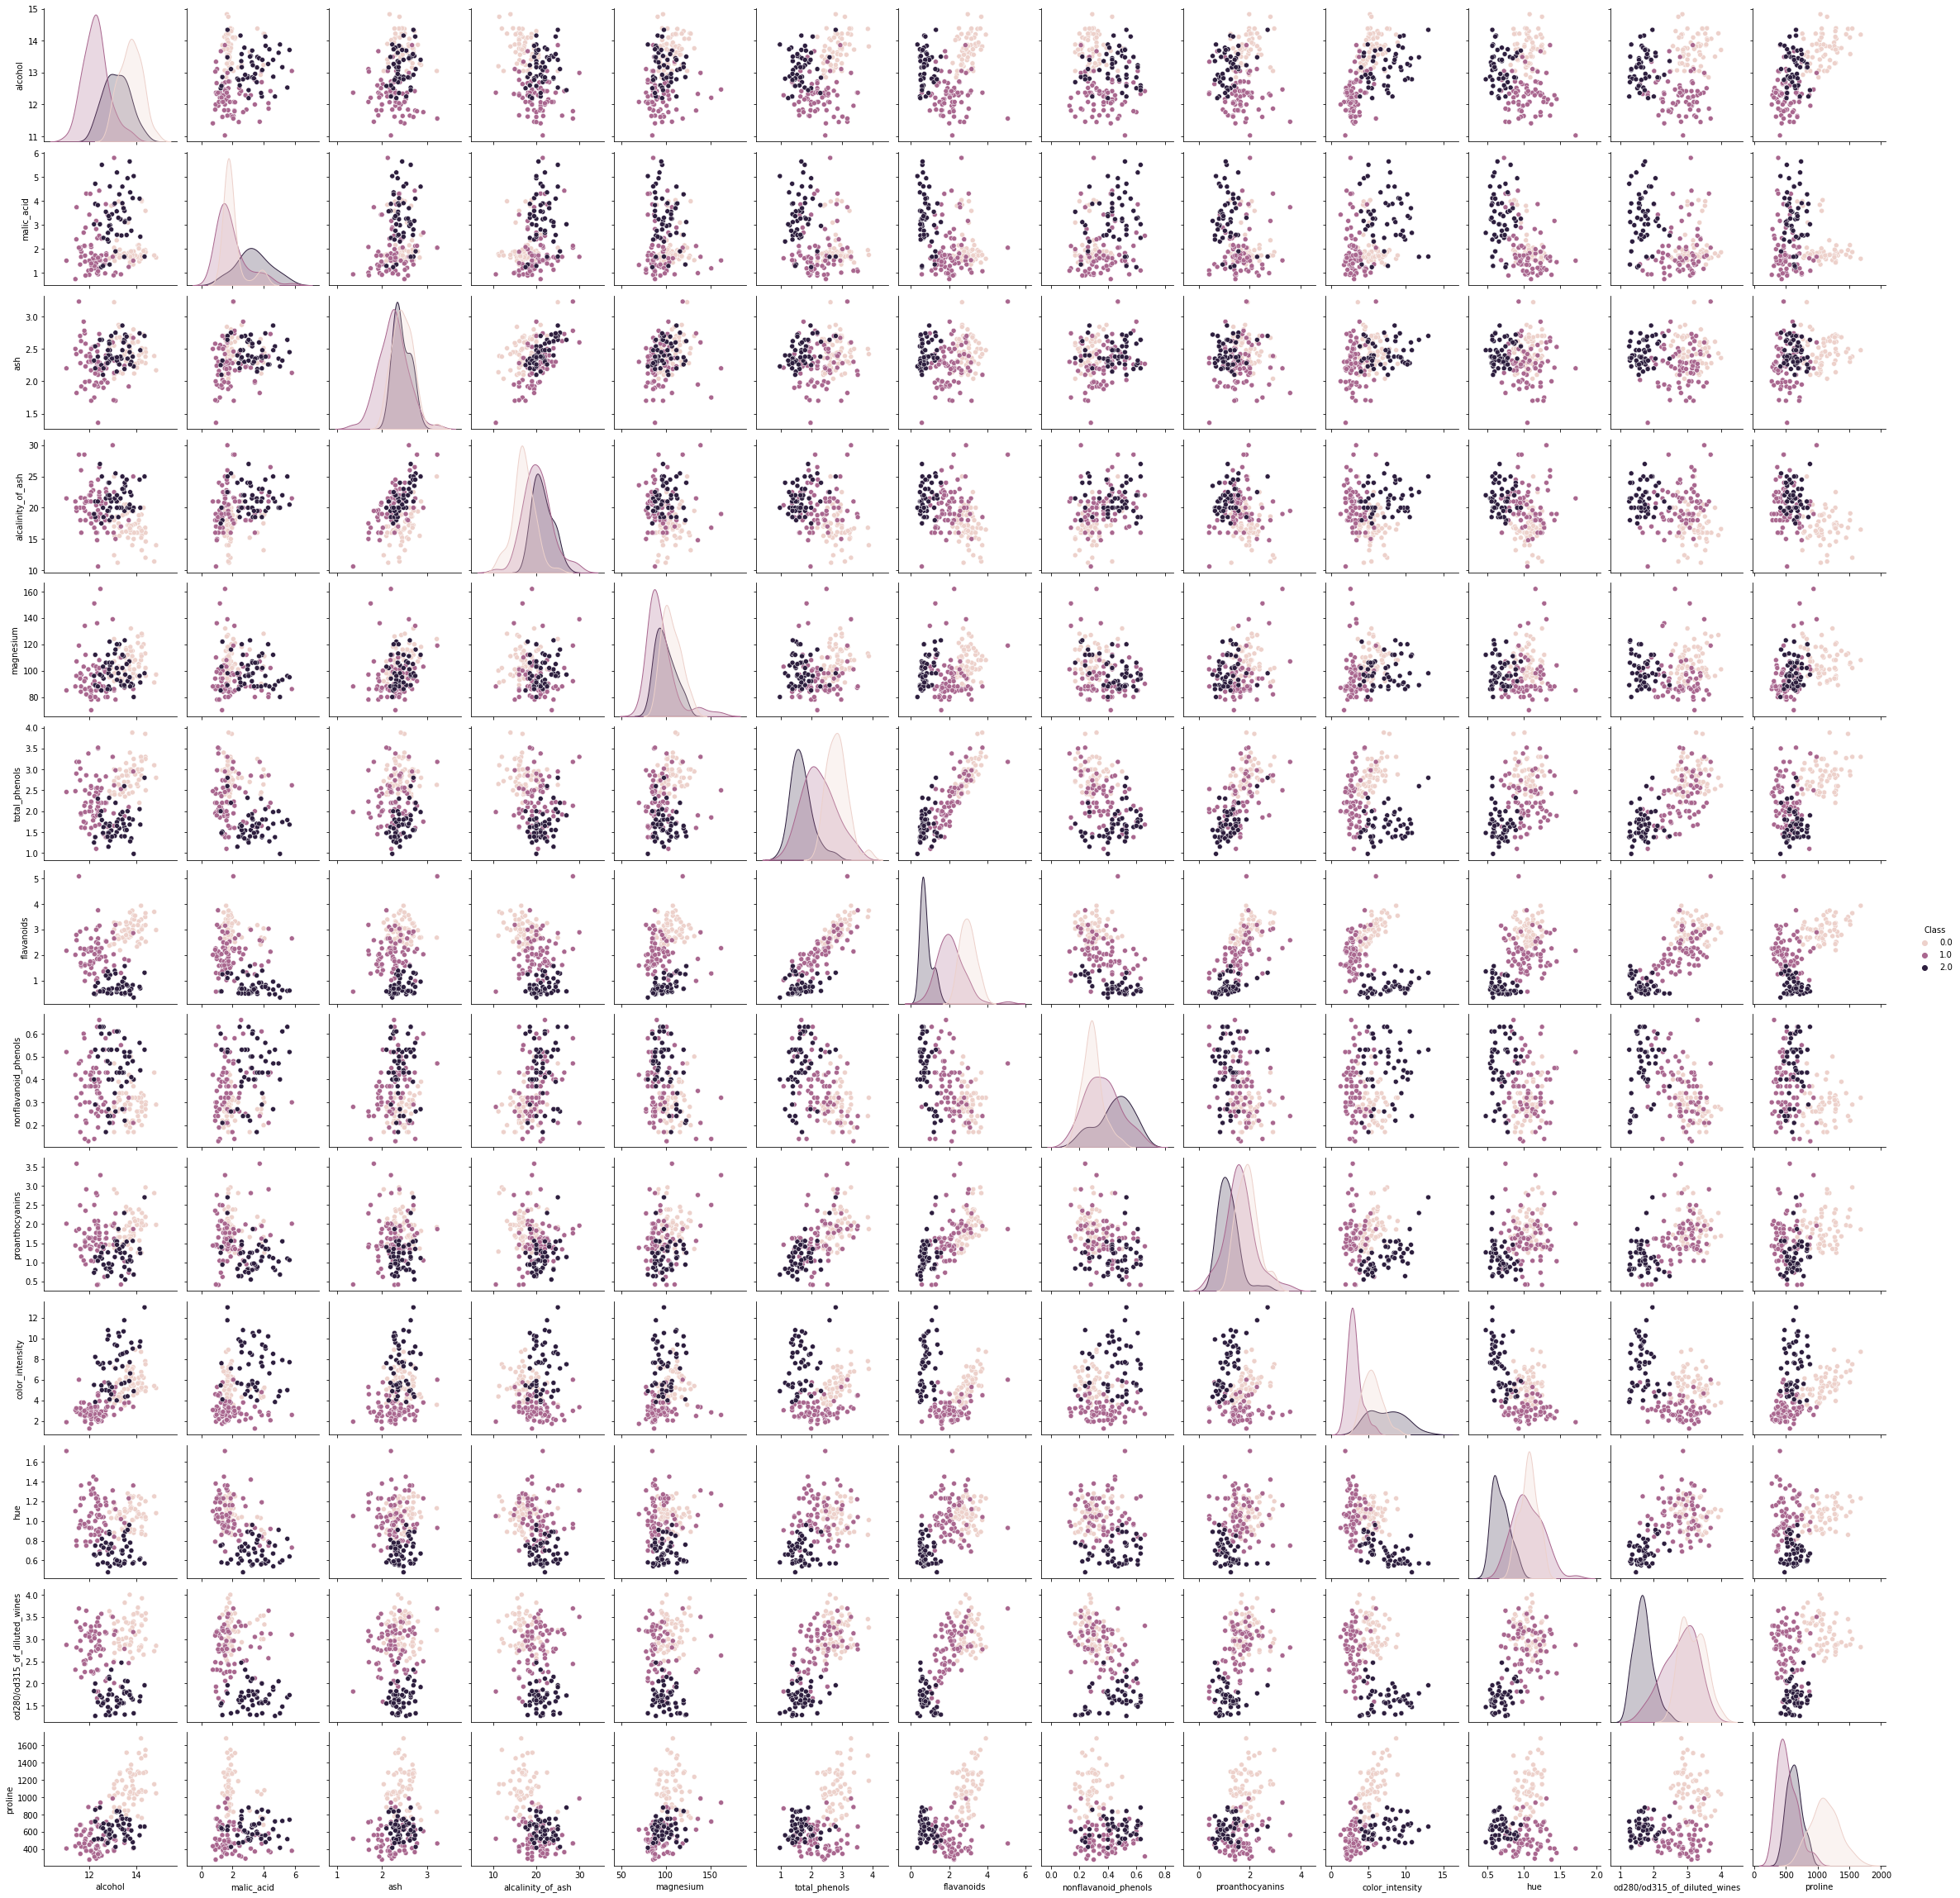

In [28]:
sns.pairplot(df_wine,hue='Class')

<AxesSubplot:xlabel='Class', ylabel='Count'>

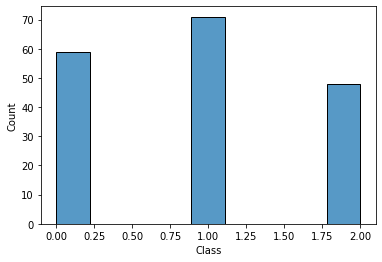

In [37]:
sns.histplot(y)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#For continues features
GNB=GaussianNB()
#For discrete features
MNB=MultinomialNB()
#For binary features
BNB=BernoulliNB()

GNB.fit(X_train,y_train)
MNB.fit(X_train,y_train)
BNB.fit(X_train,y_train)

predict_GNB=GNB.predict(X_test)
predict_MNB=MNB.predict(X_test)
predict_BNB=BNB.predict(X_test)

print('The summary score using Gaussian Naive bayes is:')
print(classification_report(y_test,predict_GNB,target_names=['class 0', 'class 1', 'class 2']))
      
print('The summary score using Multinomial Naive bayes is:')
print(classification_report(y_test,predict_MNB,target_names=['class 0', 'class 1', 'class 2']))

print('The summary score using Bernoulli Naive bayes is:')    
print(classification_report(y_test,predict_BNB,target_names=['class 0', 'class 1', 'class 2']))

The summary score using Gaussian Naive bayes is:
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        14
     class 1       1.00      1.00      1.00        14
     class 2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

The summary score using Multinomial Naive bayes is:
              precision    recall  f1-score   support

     class 0       0.88      1.00      0.93        14
     class 1       0.93      0.93      0.93        14
     class 2       0.83      0.62      0.71         8

    accuracy                           0.89        36
   macro avg       0.88      0.85      0.86        36
weighted avg       0.89      0.89      0.88        36

The summary score using Bernoulli Naive bayes is:
              precision    recall  f1-score   support

     class 0       0.00      0.0

C:\Users\guilh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\guilh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\guilh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

## The result is much better using Gaussian Distribution because the features are continues